In [142]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import time
import tracemalloc
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.utils import resample

In [143]:
!pip install xgboost

   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.8/150.0 MB 5.6 MB/s eta 0:00:27
   - -------------------------------------- 6.6/150.0 MB 21.2 MB/s eta 0:00:07
   --- ------------------------------------ 13.4/150.0 MB 25.4 MB/s eta 0:00:06
   ----- ---------------------------------- 20.7/150.0 MB 28.4 MB/s eta 0:00:05
   ------- -------------------------------- 26.7/150.0 MB 28.7 MB/s eta 0:00:05
   --------- ------------------------------ 34.1/150.0 MB 29.6 MB/s eta 0:00:04
   ---------- ----------------------------- 40.1/150.0 MB 29.3 MB/s eta 0:00:04
   ------------ --------------------------- 45.9/150.0 MB 28.9 MB/s eta 0:00:04
   ------------- -------------------------- 50.3/150.0 MB 27.6 MB/s eta 0:00:04
   -------------- ------------------------- 54.3/150.0 MB 26.8 MB/s eta 0:00:04
   --------------- ------------------------ 58.2/150.0 MB 25.9 MB/s eta 0:00:04
   ---------------- ----------------------- 62.1/150

In [144]:
df = pd.read_csv('vgsales.csv')
df.sample(25)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
12992,12994,IndyCar Series,XB,2003.0,Racing,Codemasters,0.04,0.01,0.00,0.00,0.05
3453,3455,The Sims 3: World Adventures,PC,2009.0,Simulation,Electronic Arts,0.02,0.18,0.00,0.39,0.58
2492,2494,Mega Man Legends,PS,1997.0,Adventure,Capcom,0.39,0.26,0.12,0.05,0.83
2267,2269,Sonic Riders,GC,2006.0,Racing,Sega,0.71,0.18,0.00,0.03,0.92
1752,1754,Yu-Gi-Oh! The Sacred Cards (American and Other...,GBA,2002.0,Role-Playing,Konami Digital Entertainment,0.84,0.27,0.00,0.05,1.16
9287,9289,Hot Wheels: World Race,GBA,2003.0,Racing,THQ,0.10,0.04,0.00,0.00,0.14
11556,11558,Discovery Kids: Spider Quest,DS,2009.0,Misc,505 Games,0.07,0.00,0.00,0.01,0.08
15993,15996,Blazblue: Continuum Shift Extend,PSP,2012.0,Fighting,Arc System Works,0.00,0.00,0.01,0.00,0.01
10244,10246,Alias,PS2,2004.0,Action,Acclaim Entertainment,0.05,0.04,0.00,0.01,0.11
9301,9303,Kororinpa: Marble Mania,Wii,2006.0,Puzzle,Nintendo,0.08,0.02,0.03,0.01,0.14


In [110]:
df = pd.read_csv('vgsales.csv')
df = df.drop(columns=['Rank', 'Name'])
df.fillna(df.mode().iloc[0], inplace=True)

le = LabelEncoder()
categorical_columns = ["Platform", "Genre", "Publisher"]
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    
target_column = "Global_Sales"
numeric_columns = [col for col in df.columns if col != target_column]

scaler = MinMaxScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])
df.sample(15)

,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
7720,0.433333,0.725,0.545455,0.091854,0.001205,0.003790,0.000000,0.002838,0.20
7436,0.866667,0.800,0.272727,0.909879,0.003615,0.001378,0.000000,0.001892,0.21
14811,0.600000,0.900,0.000000,0.147314,0.000000,0.000000,0.002935,0.000000,0.03
7837,0.700000,0.375,0.818182,0.772964,0.000000,0.000000,0.018591,0.000000,0.19
6628,0.133333,0.650,0.000000,0.218371,0.005544,0.000000,0.000000,0.001892,0.25
14985,0.666667,0.850,0.000000,0.398614,0.000000,0.000000,0.001957,0.000000,0.02
7970,0.533333,0.650,0.000000,0.866551,0.000000,0.000000,0.018591,0.000000,0.19
16154,0.533333,0.650,0.090909,0.845754,0.000241,0.000345,0.000000,0.000000,0.01
11286,0.200000,0.575,0.000000,0.944541,0.001446,0.000689,0.000000,0.000000,0.08
5167,0.533333,0.700,0.181818,0.601386,0.001928,0.002068,0.020548,0.001892,0.36


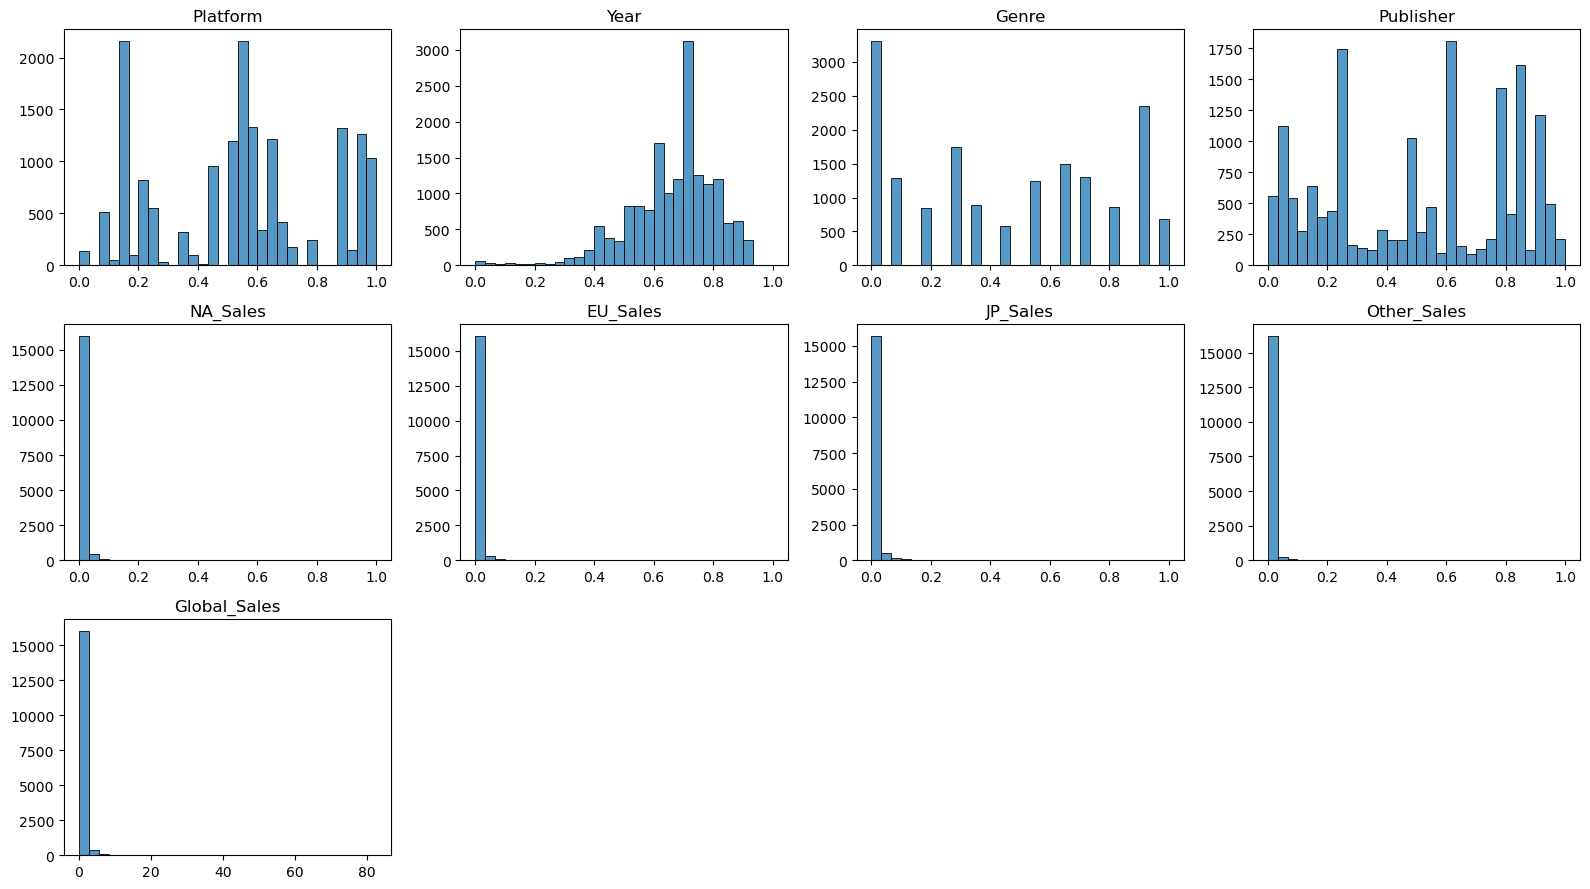

In [111]:
import math

num_columns = len(df.columns)
cols = 4 
rows = math.ceil(num_columns / cols)

plt.figure(figsize=(4 * cols, 3 * rows))

for i, col in enumerate(df.columns):
    plt.subplot(rows, cols, i+1)
    sns.histplot(df[col], bins=30)
    plt.title(col)
    plt.xlabel('')
    plt.ylabel('')

plt.tight_layout()
plt.show()

In [113]:
X = df.drop(columns=[target_column]).values
y = df[target_column].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Реализация ансамбля

In [114]:
models = [
    LinearRegression(),
    Ridge(alpha=1.0),
    DecisionTreeRegressor(max_depth=5, random_state=1),
    RandomForestRegressor(n_estimators=50, random_state=1),
    GradientBoostingRegressor(n_estimators=50, random_state=1),
    KNeighborsRegressor(n_neighbors=7)
]

tracemalloc.start()
start_time = time.time()

for model in models:
    model.fit(X_train, y_train)

current, peak = tracemalloc.get_traced_memory()
tracemalloc.stop()

end_time = time.time()
execution_time = end_time - start_time

def predict_ensemble(X):
    predictions = []
    for model in models:
        preds = model.predict(X)
        predictions.append(preds)
    predictions = np.array(predictions)
    
    return np.mean(predictions, axis=0)

y_pred = predict_ensemble(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Ошибки каждой модели по отдельности")
for model in models:
    y_pred_single = model.predict(X_test)
    mse_single = mean_squared_error(y_test, y_pred_single)
    print(f"{model.__class__.__name__} MSE: {mse_single:.4f}")
    
    
print()
print(f"Среднеквадратичная ошибка (MSE): {mse:.4f}")
print(f"Средняя абсолютная ошибка (MAE): {mae:.4f}")
print(f"Коэффициент детерминации (R²): {r2:.4f}")
print(f"Время выполнения: {execution_time:.6f} секунд")
print(f"Использование памяти: {current / 1024:.2f} KB (пиковое: {peak / 1024:.2f} KB)")

Ошибки каждой модели по отдельности
LinearRegression MSE: 0.0000
Ridge MSE: 0.0175
DecisionTreeRegressor MSE: 0.9431
RandomForestRegressor MSE: 0.0476
GradientBoostingRegressor MSE: 0.0405
KNeighborsRegressor MSE: 0.7218

Среднеквадратичная ошибка (MSE): 0.0768
Средняя абсолютная ошибка (MAE): 0.0873
Коэффициент детерминации (R²): 0.9649
Время выполнения: 7.029057 секунд
Использование памяти: 379.19 KB (пиковое: 1795.79 KB)


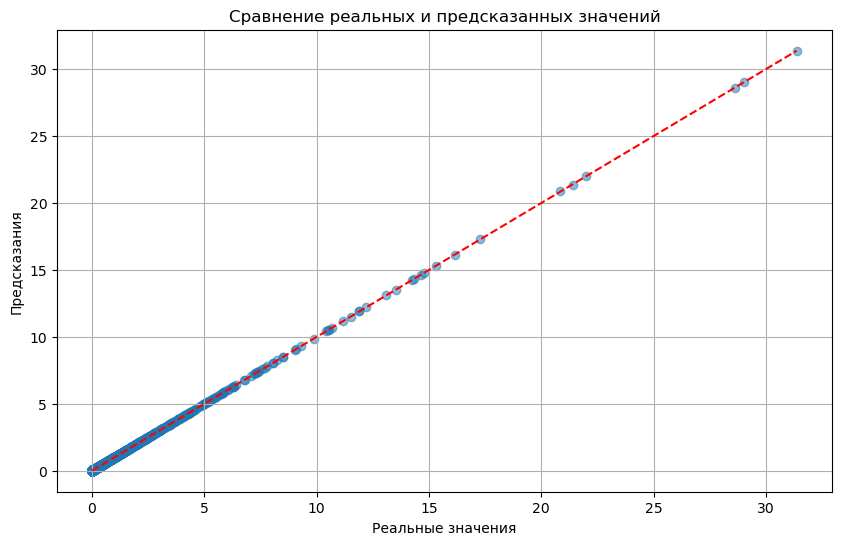

In [123]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Реальные значения")
plt.ylabel("Предсказания")
plt.title("Сравнение реальных и предсказанных значений")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--")  # Линия идеального предсказания
plt.grid()
plt.show()

# Стекинг

In [158]:
models = [
    LinearRegression(),
    Ridge(alpha=1.0),
    DecisionTreeRegressor(max_depth=5, random_state=1),
    RandomForestRegressor(n_estimators=50, random_state=1),
    GradientBoostingRegressor(n_estimators=50, random_state=1),
    KNeighborsRegressor(n_neighbors=7)
]

tracemalloc.start()
start_time = time.time()

for model in models:
    model.fit(X_train, y_train)

s_current, s_peak = tracemalloc.get_traced_memory()
tracemalloc.stop()

end_time = time.time()
s_execution_time = end_time - start_time

# Создание и обучение мета-модели
meta_features = np.column_stack([model.predict(X_train) for model in models])

meta_model = LinearRegression()
meta_model.fit(meta_features, y_train)

meta_test_features = np.column_stack([model.predict(X_test) for model in models])
y_pred = meta_model.predict(meta_test_features)

s_mae = mean_absolute_error(y_test, y_pred)
s_mse = mean_squared_error(y_test, y_pred)
s_r2 = r2_score(y_test, y_pred)
    
print()
print(f"Среднеквадратичная ошибка (MSE): {s_mae:.6f}")
print(f"Средняя абсолютная ошибка (MAE): {s_mse:.6f}")
print(f"Коэффициент детерминации (R²): {s_r2:.6f}")
print(f"Время выполнения: {s_execution_time:.6f} секунд")
print(f"Использование памяти: {s_current / 1024:.2f} KB (пиковое: {s_peak / 1024:.2f} KB)")


Среднеквадратичная ошибка (MSE): 0.002950
Средняя абсолютная ошибка (MAE): 0.000027
Коэффициент детерминации (R²): 0.999987
Время выполнения: 7.265750 секунд
Использование памяти: 380.39 KB (пиковое: 1648.73 KB)


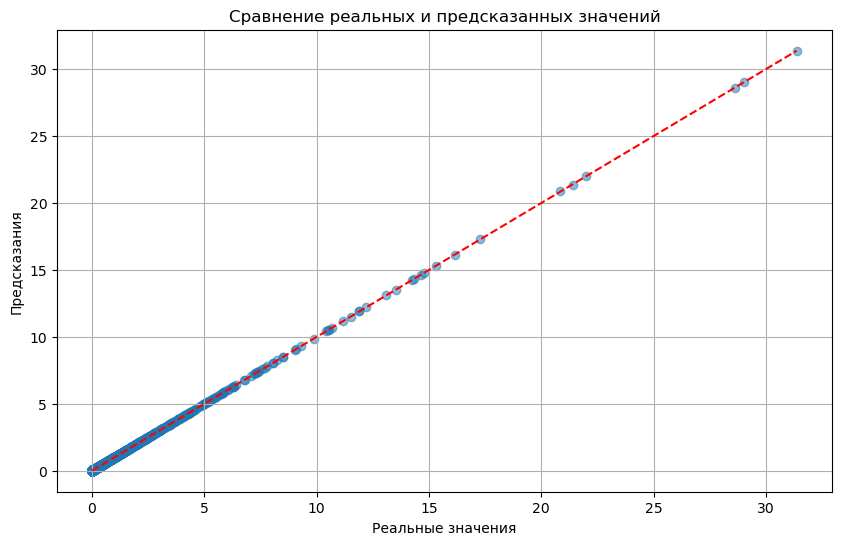

In [133]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Реальные значения")
plt.ylabel("Предсказания")
plt.title("Сравнение реальных и предсказанных значений")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--")  # Линия идеального предсказания
plt.grid()
plt.show()

# Бэггинг

In [159]:
base_model = DecisionTreeRegressor(max_depth=5, random_state=1)

n_models = 5
bagged_models = []

tracemalloc.start()
start_time = time.time()

for _ in range(n_models):
    X_bootstrap, y_bootstrap = resample(X_train, y_train, random_state=1)
    model = DecisionTreeRegressor(max_depth=5, random_state=1)
    model.fit(X_bootstrap, y_bootstrap)
    bagged_models.append(model)

bag_current, bag_peak = tracemalloc.get_traced_memory()
tracemalloc.stop()

end_time = time.time()
bag_execution_time = end_time - start_time

y_pred = np.mean([model.predict(X_test) for model in bagged_models], axis=0)

bag_mae = mean_absolute_error(y_test, y_pred)
bag_mse = mean_squared_error(y_test, y_pred)
bag_r2 = r2_score(y_test, y_pred)
       
print(f"Среднеквадратичная ошибка (MSE): {bag_mse:.6f}")
print(f"Средняя абсолютная ошибка (MAE): {bag_mae:.6f}")
print(f"Коэффициент детерминации (R²): {bag_r2:.6f}")
print(f"Время выполнения: {bag_execution_time:.6f} секунд")
print(f"Использование памяти: {bag_current / 1024:.2f} KB (пиковое: {bag_peak / 1024:.2f} KB)")

Среднеквадратичная ошибка (MSE): 0.195879
Средняя абсолютная ошибка (MAE): 0.185551
Коэффициент детерминации (R²): 0.910563
Время выполнения: 0.230440 секунд
Использование памяти: 971.11 KB (пиковое: 1904.28 KB)


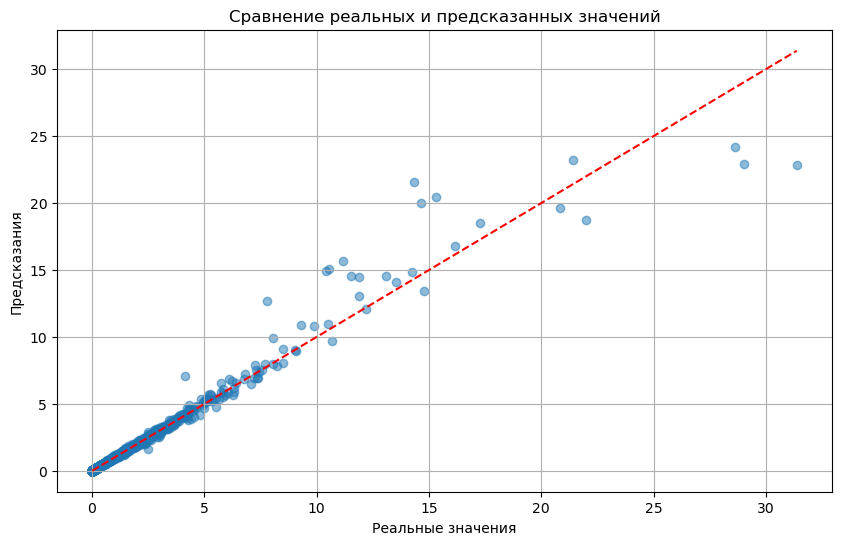

In [162]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Реальные значения")
plt.ylabel("Предсказания")
plt.title("Сравнение реальных и предсказанных значений")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--")  # Линия идеального предсказания
plt.grid()
plt.show()

# Бустинг

In [163]:
from xgboost import XGBRegressor

boosting_model = XGBRegressor(n_estimators=300, learning_rate=0.1, max_depth=4, random_state=1)

tracemalloc.start()
start_time = time.time()

boosting_model.fit(X_train, y_train)

boost_current, boost_peak = tracemalloc.get_traced_memory()
tracemalloc.stop()

end_time = time.time()
boost_execution_time = end_time - start_time

y_pred = boosting_model.predict(X_test)

boost_mae = mean_absolute_error(y_test, y_pred)
boost_mse = mean_squared_error(y_test, y_pred)
boost_r2 = r2_score(y_test, y_pred)

print(f"Среднеквадратичная ошибка (MSE): {boost_mse:.6f}")
print(f"Средняя абсолютная ошибка (MAE): {boost_mae:.6f}")
print(f"Коэффициент детерминации (R²): {boost_r2:.6f}")
print(f"Время выполнения: {boost_execution_time:.6f} секунд")
print(f"Использование памяти: {boost_current / 1024:.2f} KB (пиковое: {boost_peak / 1024:.2f} KB)")

Среднеквадратичная ошибка (MSE): 0.078854
Средняя абсолютная ошибка (MAE): 0.035527
Коэффициент детерминации (R²): 0.963996
Время выполнения: 0.321192 секунд
Использование памяти: 12.76 KB (пиковое: 30.86 KB)


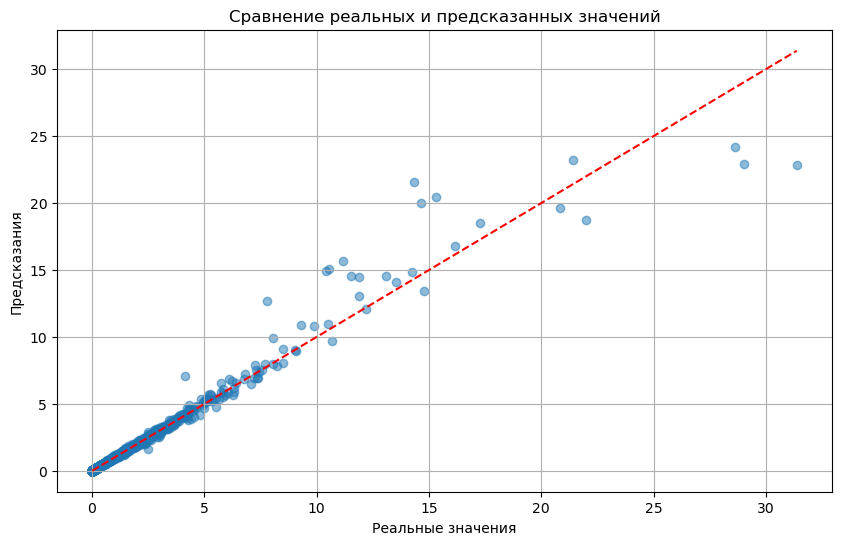

In [164]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Реальные значения")
plt.ylabel("Предсказания")
plt.title("Сравнение реальных и предсказанных значений")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--")  # Линия идеального предсказания
plt.grid()
plt.show()

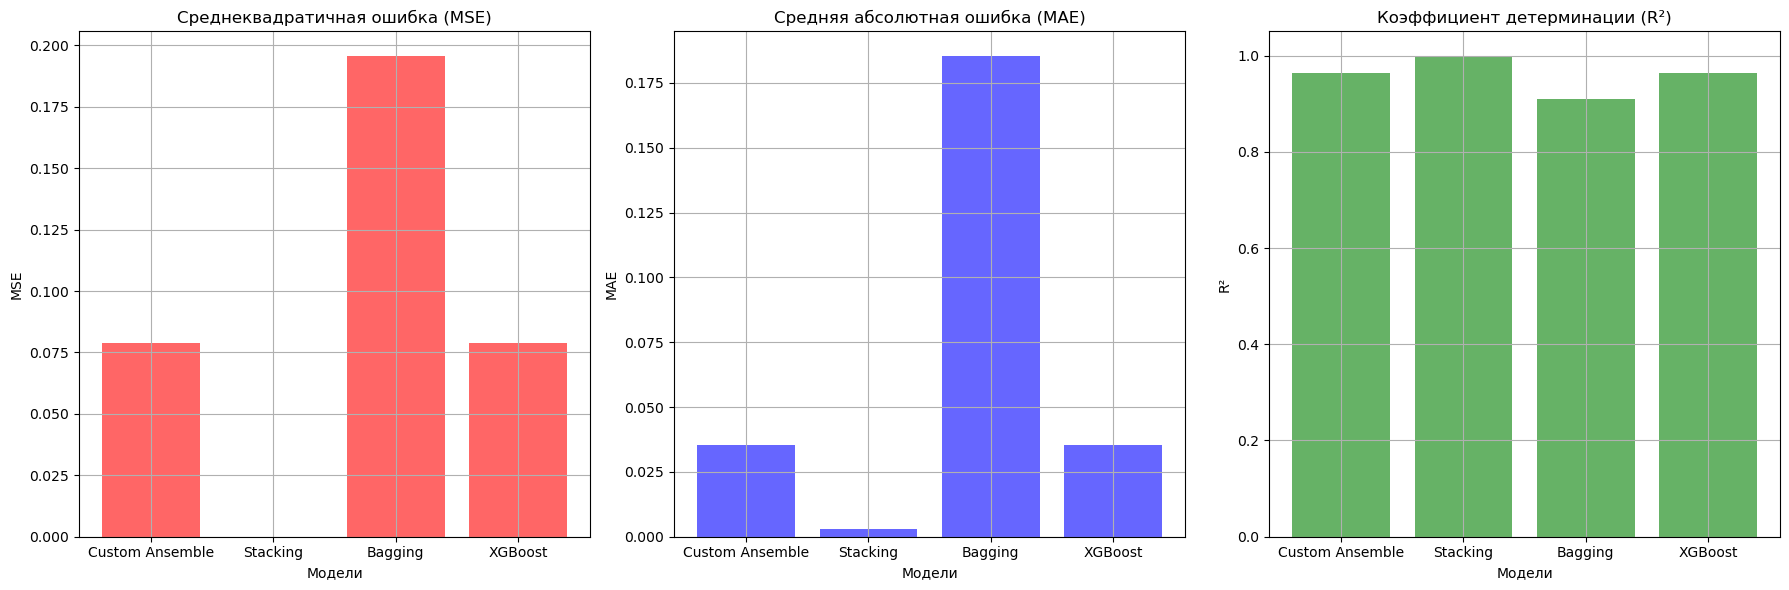

In [165]:
models = ["Custom Ansemble", "Stacking", "Bagging", "XGBoost"]

mse_values = [mse, s_mse, bag_mse, boost_mse]
mae_values = [mae, s_mae, bag_mae, boost_mae] 
r2_values = [r2, s_r2, bag_r2, boost_r2]

x = np.arange(len(models))

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

axes[0].bar(x, mse_values, color="red", alpha=0.6)
axes[0].set_xticks(x)
axes[0].set_xticklabels(models)
axes[0].set_xlabel("Модели")
axes[0].set_ylabel("MSE")
axes[0].set_title("Среднеквадратичная ошибка (MSE)")
axes[0].grid(True)

axes[1].bar(x, mae_values, color="blue", alpha=0.6)
axes[1].set_xticks(x)
axes[1].set_xticklabels(models)
axes[1].set_xlabel("Модели")
axes[1].set_ylabel("MAE")
axes[1].set_title("Средняя абсолютная ошибка (MAE)")
axes[1].grid(True)

axes[2].bar(x, r2_values, color="green", alpha=0.6)
axes[2].set_xticks(x)
axes[2].set_xticklabels(models)
axes[2].set_xlabel("Модели")
axes[2].set_ylabel("R²")
axes[2].set_title("Коэффициент детерминации (R²)")
axes[2].grid(True)

plt.tight_layout()
plt.show()


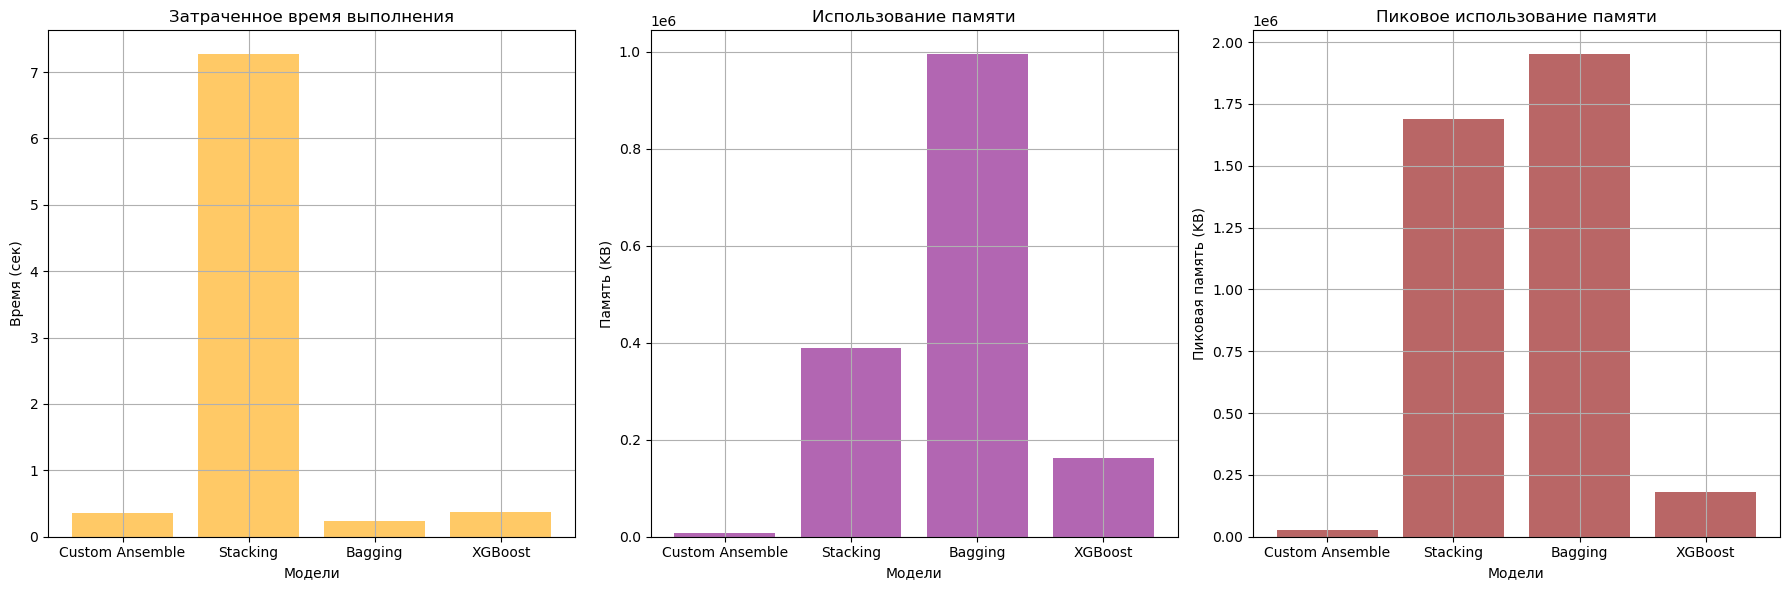

In [161]:
models = ["Custom Ansemble", "Stacking", "Bagging", "XGBoost"]

execution_times = [execution_time, s_execution_time, bag_execution_time, boost_execution_time]
memory_usages = [current, s_current, bag_current, boost_current]
peak_memory_usages = [peak, s_peak, bag_peak, boost_peak]

x = np.arange(len(models))

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

axes[0].bar(x, execution_times, color="orange", alpha=0.6)
axes[0].set_xticks(x)
axes[0].set_xticklabels(models)
axes[0].set_xlabel("Модели")
axes[0].set_ylabel("Время (сек)")
axes[0].set_title("Затраченное время выполнения")
axes[0].grid(True)

axes[1].bar(x, memory_usages, color="purple", alpha=0.6)
axes[1].set_xticks(x)
axes[1].set_xticklabels(models)
axes[1].set_xlabel("Модели")
axes[1].set_ylabel("Память (KB)")
axes[1].set_title("Использование памяти")
axes[1].grid(True)

axes[2].bar(x, peak_memory_usages, color="darkred", alpha=0.6)
axes[2].set_xticks(x)
axes[2].set_xticklabels(models)
axes[2].set_xlabel("Модели")
axes[2].set_ylabel("Пиковая память (KB)")
axes[2].set_title("Пиковое использование памяти")
axes[2].grid(True)

plt.tight_layout()
plt.show()
